# Objectives
1) What are the five most popular "commuter trips"?
    a) How do you define commuter?
    b) How did you determine these five routes?
2) How to increase ridership through promotions?

## Existing Promotions
 - Cheaper memberships for low income families or people
 - Single Ride
 - Monthly Membership
 - Annual Membership
 - Bike Share for All
 - Access Pass
 - Corporate Membership
 - Grubhub membership
 - Hilton and Delta points
 - Credit card points

## Example recommendations
 - Market offers differently to generate more revenue
 - Remove offers that are not working
 - Modify exising offers to generate more revenue
 - Create new offers for hidden business opportunities you have found
 
## Follow up questions:
 "In data exploration process, you will find a lot of dirty data, that you will need to either clean or filter out."
 - Can we filter using a python notebook? How? (Given the current data set.) How do we use SQL to explore the data after filtering via Python?
"In the final Jupyter Notebook, the results of your BigQuery SQL will be read into Pandas, where you will use the skills you learned in the Python class to print formatted Pandas tables, simple data visualizations using Seaborn / Matplotlib, etc."
 - How do we get the SQL query into the jupyter notebook?


## Datasets & Their Contents
- Bikeshare status
    - Station ID, Bikes Available, Docks Available, Time
- Bikeshare stations
    - Station ID, Name, Lattitude, Longitude, Dock Count, Landmark, Installation Date
- Bikeshare trips
    - Trip ID, Duration, Start Date, Start Station Name, Start Station ID, End Date, End Station Name, End Station ID, Bike number, Zip Code, Subscription Type

## What defines a commuter trip?
### After initial dataset discovery, initial observations / thoughts listed below

- start and end station differ
- subscribers are the main customers
- hours of the day? 7-9AM, 4-6PM
- average duration ~10 minutes

## What defines a non-commuter trip?
### After initial dataset discovery, initial observations / thoughts listed below

- one time purchase customers are the main customers
- start and end station could be the same
- hours of the day 10AM - 3PM: daylight hours not during commuting times
- months of the year
- average duration ~1 hr

### Count the number of trips per hour of day for commuters and output a graph

In [37]:
%%bigquery hours_of_trips

SELECT subscriber_type, SUM(
    CASE
    WHEN time(CAST(start_date AS datetime) ) < "1:00:00"
        THEN 1
        ELSE 0
        END
    ) AS Trips_12AM,
    SUM(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "2:00:00" AND time(CAST(start_date AS datetime) ) >= "1:00:00"
            THEN 1
            ELSE 0
        END
    ) AS Trips_1AM,
    SUM(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "3:00:00" AND time(CAST(start_date AS datetime) ) >= "2:00:00"
            THEN 1
            ELSE 0
        END
    ) AS Trips_2AM,
    SUM(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "4:00:00" AND time(CAST(start_date AS datetime) ) >= "3:00:00"
            THEN 1
            ELSE 0
        END
    ) AS Trips_3AM,
    SUM(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "5:00:00" AND time(CAST(start_date AS datetime) ) >= "4:00:00"
            THEN 1
            ELSE 0
        END
    ) AS Trips_4AM,
    SUM(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "6:00:00" AND time(CAST(start_date AS datetime) ) >= "5:00:00"
            THEN 1
            ELSE 0
    END
    ) AS Trips_5AM,
    SUM(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "7:00:00" AND time(CAST(start_date AS datetime) ) >= "6:00:00"
            THEN 1
            ELSE 0
    END
    ) AS Trips_6AM,
    SUM(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "8:00:00" AND time(CAST(start_date AS datetime) ) >= "7:00:00"
            THEN 1
            ELSE 0
    END
    ) AS Trips_7AM,
    SUM(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "9:00:00" AND time(CAST(start_date AS datetime) ) >= "8:00:00"
            THEN 1
            ELSE 0
    END
    ) AS Trips_8AM,
    SUM(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "10:00:00" AND time(CAST(start_date AS datetime) ) >= "9:00:00"
            THEN 1
            ELSE 0
        END
        ) AS Trips_9AM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "11:00:00" AND time(CAST(start_date AS datetime) ) >= "10:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_10AM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "12:00:00" AND time(CAST(start_date AS datetime) ) >= "11:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_11AM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "13:00:00" AND time(CAST(start_date AS datetime) ) >= "12:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_12PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "14:00:00" AND time(CAST(start_date AS datetime) ) >= "13:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_1PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "15:00:00" AND time(CAST(start_date AS datetime) ) >= "14:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_2PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "16:00:00" AND time(CAST(start_date AS datetime) ) >= "15:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_3PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "17:00:00" AND time(CAST(start_date AS datetime) ) >= "16:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_4PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "18:00:00" AND time(CAST(start_date AS datetime) ) >= "17:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_5PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "19:00:00" AND time(CAST(start_date AS datetime) ) >= "18:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_6PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "20:00:00" AND time(CAST(start_date AS datetime) ) >= "19:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_7PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "21:00:00" AND time(CAST(start_date AS datetime) ) >= "20:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_8PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "22:00:00" AND time(CAST(start_date AS datetime) ) >= "21:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_9PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "23:00:00" AND time(CAST(start_date AS datetime) ) >= "22:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_10PM,
        SUM(
         CASE
             WHEN time(CAST(start_date AS datetime) ) >= "23:00:00"
             THEN 1
             ELSE 0
         END
        ) AS Trips_11PM
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
Group By subscriber_type

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.82rows/s]


In [22]:
hours_of_trips


,subscriber_type,Trips_12AM,Trips_1AM,Trips_2AM,Trips_3AM,Trips_4AM,Trips_5AM,Trips_6AM,Trips_7AM,Trips_8AM,...,Trips_2PM,Trips_3PM,Trips_4PM,Trips_5PM,Trips_6PM,Trips_7PM,Trips_8PM,Trips_9PM,Trips_10PM,Trips_11PM
0,Customer,848,639,413,208,160,303,945,2585,5293,...,12737,12806,12704,11387,8771,5556,3741,2808,2285,1493
1,Subscriber,2081,972,464,397,1238,4795,19574,64946,127171,...,25115,34820,76051,114915,75798,35515,19006,12450,7985,4702


In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns

In [182]:
melted_hours = pd.melt(hours_of_trips, id_vars = 'subscriber_type', var_name = 'hour', value_name = 'trip_count' )
melted_hours.hour = melted_hours.hour.str[6:]


Text(0.5, 1.0, 'Peak hours for subscribers are between 7AM-9AM and 4PM-6PM')

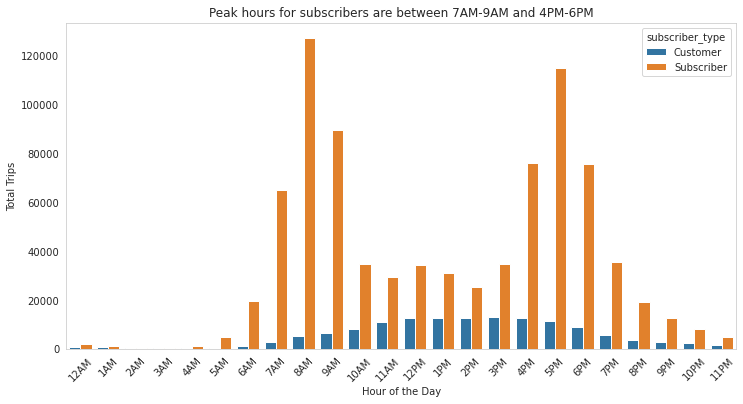

In [44]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (12,6))
count_shape = sns.barplot(x = melted_hours.hour, y= melted_hours.trip_count, hue = melted_hours.subscriber_type)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Total Trips')
plt.xlabel('Hour of the Day')
plt.title('Peak hours for subscribers are between 7AM-9AM and 4PM-6PM')

As you can see, the peak hours for subscribers to ride is from7-9AM and 4-6PM. This is often hours when people are commuting to school or work. Non-subscribing customers on the other hand have a pretty consistent number of rides between 11AM-5PM. This coincides with daylight hours, meaning non-subscribers bike a pretty average amount throughout the day. There are no specific times with significantly increased ridership for commuting, going to lunch, or any other specific reason.

### Average duration of subscriber versus customer trips

Let's take a look into the average duration of trips taken by subscribers vs customers to get a better understanding of how customers are using our service. 

In [194]:
%%bigquery average_duration 
    SELECT subscriber_type, AVG(duration_sec) AS Avg_Subscriber_Duration
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`
        GROUP BY subscriber_type


Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.11rows/s]


In [195]:
average_duration

,subscriber_type,Avg_Subscriber_Duration
0,Customer,3718.78516
1,Subscriber,582.76424


In [196]:
#output the average duration of rides in minutes
average_duration_2 = average_duration
average_duration_2.Avg_Subscriber_Duration = average_duration_2.Avg_Subscriber_Duration.apply(lambda x: x / 60)
average_duration_2

,subscriber_type,Avg_Subscriber_Duration
0,Customer,61.979753
1,Subscriber,9.712737


This table output shows that the average duration of a customer's ride is 60 minutes, versus a subscriber's is 10 minutes. Let take a deeper look into trip duration based on start time of a ride to visualize the types of rides happening.

In [132]:
%%bigquery duration_hours_test

SELECT subscriber_type, AVG(
    CASE
    WHEN time(CAST(start_date AS datetime) ) < "1:00:00"
        THEN duration_sec
        END
    ) AS Dur_12AM,
    AVG(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "2:00:00" AND time(CAST(start_date AS datetime) ) >= "1:00:00"
            THEN duration_sec
        END
    ) AS Dur_1AM,
    AVG(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "3:00:00" AND time(CAST(start_date AS datetime) ) >= "2:00:00"
            THEN duration_sec
        END
    ) AS Dur_2AM,
    AVG(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "4:00:00" AND time(CAST(start_date AS datetime) ) >= "3:00:00"
            THEN duration_sec
        END
    ) AS Dur_3AM,
    AVG(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "5:00:00" AND time(CAST(start_date AS datetime) ) >= "4:00:00"
            THEN duration_sec
        END
    ) AS Dur_4AM,
    AVG(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "6:00:00" AND time(CAST(start_date AS datetime) ) >= "5:00:00"
            THEN duration_sec
    END
    ) AS Dur_5AM,
    AVG(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "7:00:00" AND time(CAST(start_date AS datetime) ) >= "6:00:00"
            THEN duration_sec
    END
    ) AS Dur_6AM,
    AVG(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "8:00:00" AND time(CAST(start_date AS datetime) ) >= "7:00:00"
            THEN duration_sec
    END
    ) AS Dur_7AM,
    AVG(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "9:00:00" AND time(CAST(start_date AS datetime) ) >= "8:00:00"
            THEN duration_sec
    END
    ) AS Dur_8AM,
    AVG(
        CASE
            WHEN time(CAST(start_date AS datetime) ) < "10:00:00" AND time(CAST(start_date AS datetime) ) >= "9:00:00"
            THEN duration_sec
        END
        ) AS Dur_9AM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "11:00:00" AND time(CAST(start_date AS datetime) ) >= "10:00:00"
             THEN duration_sec
         END
        ) AS Dur_10AM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "12:00:00" AND time(CAST(start_date AS datetime) ) >= "11:00:00"
             THEN duration_sec
         END
        ) AS Dur_11AM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "13:00:00" AND time(CAST(start_date AS datetime) ) >= "12:00:00"
             THEN duration_sec
         END
        ) AS Dur_12PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "14:00:00" AND time(CAST(start_date AS datetime) ) >= "13:00:00"
             THEN duration_sec
         END
        ) AS Dur_1PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "15:00:00" AND time(CAST(start_date AS datetime) ) >= "14:00:00"
             THEN duration_sec
         END
        ) AS Dur_2PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "16:00:00" AND time(CAST(start_date AS datetime) ) >= "15:00:00"
             THEN duration_sec
         END
        ) AS Dur_3PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "17:00:00" AND time(CAST(start_date AS datetime) ) >= "16:00:00"
             THEN duration_sec
         END
        ) AS Dur_4PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "18:00:00" AND time(CAST(start_date AS datetime) ) >= "17:00:00"
             THEN duration_sec
         END
        ) AS Dur_5PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "19:00:00" AND time(CAST(start_date AS datetime) ) >= "18:00:00"
             THEN duration_sec
         END
        ) AS Dur_6PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "20:00:00" AND time(CAST(start_date AS datetime) ) >= "19:00:00"
             THEN duration_sec
         END
        ) AS Dur_7PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "21:00:00" AND time(CAST(start_date AS datetime) ) >= "20:00:00"
             THEN duration_sec
         END
        ) AS Dur_8PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "22:00:00" AND time(CAST(start_date AS datetime) ) >= "21:00:00"
             THEN duration_sec
         END
        ) AS Dur_9PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) < "23:00:00" AND time(CAST(start_date AS datetime) ) >= "22:00:00"
             THEN duration_sec
         END
        ) AS Dur_10PM,
        AVG(
         CASE
             WHEN time(CAST(start_date AS datetime) ) >= "23:00:00"
             THEN duration_sec
         END
        ) AS Dur_11PM
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
Group By subscriber_type

Downloading: 100%|██████████| 2/2 [00:00<00:00,  2.28rows/s]


In [133]:
duration_hours_test

,subscriber_type,Dur_12AM,Dur_1AM,Dur_2AM,Dur_3AM,Dur_4AM,Dur_5AM,Dur_6AM,Dur_7AM,Dur_8AM,...,Dur_2PM,Dur_3PM,Dur_4PM,Dur_5PM,Dur_6PM,Dur_7PM,Dur_8PM,Dur_9PM,Dur_10PM,Dur_11PM
0,Customer,4120.179245,6580.075117,8482.300242,22628.201923,7142.743750,9416.465347,4795.276190,3113.510638,2881.597204,...,3705.139122,3269.413322,3050.060375,2596.365592,2561.790104,2400.970482,2811.553863,9859.727208,3052.784683,4341.93637
1,Subscriber,560.671792,583.350823,732.420259,618.987406,409.635703,533.490928,652.693829,572.103932,574.989951,...,582.604858,586.363900,598.367595,576.956594,602.907610,591.235844,572.189151,595.348514,609.406011,587.20353


In [183]:
melted_duration_hours = pd.melt(duration_hours_test, id_vars = 'subscriber_type', var_name = 'hour', value_name = 'avg_duration_sec' )
melted_duration_hours['hour'] = melted_hours['hour'].str[-4:]
melted_duration_hours['avg_duration_min'] = melted_duration_hours['avg_duration_sec'].apply(lambda x: x/60)


In [159]:
is_cust = melted_duration_hours['subscriber_type']== "Customer"
cust_duration_hours = melted_duration_hours[is_cust]
is_sub = melted_duration_hours['subscriber_type']== "Subscriber"
sub_duration_hours = melted_duration_hours[is_sub]

In [197]:
print("The maximum average trip length for a customer was", round(max(cust_duration_hours.avg_duration_min),2), "minutes or", round(max(cust_duration_hours.avg_duration_min)/60,2), "hours, and the minimum average trip length for customer was", round(min(cust_duration_hours.avg_duration_min),2), "minutes")
print("The maximum average trip length for a subscriber was", round(max(sub_duration_hours.avg_duration_min),2),  "minutes, and the minimum average trip length for a subscriber was", round(min(sub_duration_hours.avg_duration_min),2), "minuters")

The maximum average trip length for a customer was 377.14 minutes or 6.29 hours, and the minimum average trip length for customer was 40.02 minutes
The maximum average trip length for a subscriber was 12.21 minutes, and the minimum average trip length for a subscriber was 6.83 minuters


Text(0.5, 1.0, 'Average duration of subscriber trips are 6x less than customer trips at 10min long')

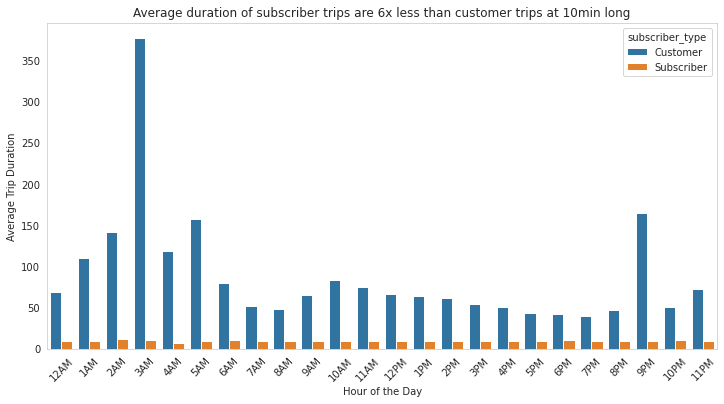

In [142]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (12,6))
count_shape = sns.barplot(x = melted_duration_hours.hour, y= melted_duration_hours.avg_duration_min, hue = melted_hours.subscriber_type)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Average Trip Duration')
plt.xlabel('Hour of the Day')
plt.title('Average duration of subscriber trips are 6x less than customer trips at 10min long')

From this graph, we can see that there is a significant difference in the types of trips subscribers are going on versus customers. Subscribers go on significantly shorter trips with a maximum average trip length of 12 min. Customers go on much longer trips with a maximum average trip length of 6 hours.

### Defining a commuter trip

Given this difference in trip duration, it is fair to say that most subscribers use the service to get quickly from one place to another, where customers that have 1-3 day passes to access the bikes often use the bikes on longer trips. To define a commuter trip, I will use the Subscriber subscriber type because they often take quick trips as a mode of transportation and they are regular customers due to the subscription nature of their membership. In addition, I will use the peak riding hours from 7AM-9AM and 4PM-6PM as the times commuters are riding bikes. Not only were these times when subscribers were riding most often, they also coincide with when people are normally going to and from school or work. Lastly, I will use the criteria that the start and end destination are not the same to define a commuter trip. This makes sense because if someone is commuting, they are traveling to a particular destination. They wouldn't be starting and ending in the same location. 
With these 3 criteria, the following code will assist in defining the five most popular commuter trips.

### Morining top 5 commuter trips

In [78]:
%%bigquery am_commuter_trips
    SELECT start_station_name, end_station_name, count(end_station_id) AS Trips_Count
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`
        WHERE subscriber_type = "Subscriber" AND start_station_name <> end_station_name AND (((time(CAST(start_date AS datetime) ) < "9:00:00" AND  time(CAST(start_date AS datetime) ) >= "7:00:00") ))
        GROUP BY start_station_name, end_station_name
        ORDER BY Trips_Count DESC

Downloading: 100%|██████████| 1550/1550 [00:00<00:00, 1712.27rows/s]


In [83]:
am_commuter_trips['time_of_day'] = 'AM'
am_commuter_trips.head()

,start_station_name,end_station_name,Trips_Count,time_of_day
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,3659,AM
1,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,2598,AM
2,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),2520,AM
3,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),2321,AM
4,San Francisco Caltrain (Townsend at 4th),Steuart at Market,2189,AM


### Evening top 5 commuter trips

In [75]:
%%bigquery pm_commuter_trips
    SELECT start_station_name, end_station_name, count(end_station_id) AS Trips_Count
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`
        WHERE subscriber_type = "Subscriber" AND start_station_name <> end_station_name AND ( (time(CAST(start_date AS datetime) ) < "18:00:00" AND  time(CAST(start_date AS datetime) ) >= "16:00:00"))
        GROUP BY start_station_name, end_station_name
        ORDER BY Trips_Count DESC

Downloading: 100%|██████████| 1718/1718 [00:00<00:00, 1908.91rows/s]


In [80]:
pm_commuter_trips['time_of_day'] = 'PM'

In [82]:
pm_commuter_trips.head()

,start_station_name,end_station_name,Trips_Count,time_of_day
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),3457,PM
1,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3331,PM
2,Embarcadero at Sansome,Steuart at Market,2936,PM
3,Steuart at Market,San Francisco Caltrain (Townsend at 4th),2774,PM
4,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),2724,PM


### Most popular AM and PM commuter trips

In [172]:
commuter_trips = pm_commuter_trips[0:5].append(am_commuter_trips[0:5])

In [173]:
commuter_trips = commuter_trips.sort_values('Trips_Count',ascending = False)

In [174]:
commuter_trips.reset_index(drop=True, inplace=True) 
commuter_trips

,start_station_name,end_station_name,Trips_Count,time_of_day
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,3659,AM
1,2nd at Townsend,Harry Bridges Plaza (Ferry Building),3457,PM
2,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3331,PM
3,Embarcadero at Sansome,Steuart at Market,2936,PM
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),2774,PM
5,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),2724,PM
6,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,2598,AM
7,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),2520,AM
8,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),2321,AM
9,San Francisco Caltrain (Townsend at 4th),Steuart at Market,2189,AM


### Top 5 Commuter Trips

The above table defines the top 10 commuter trips, given the specfic criteria listed below for a commuter trip.
 * start and end destination differ
 * subscriber is the subscriber type
 * trip is between 7-9AM or 4-6PM

The top five commuter trips are listed below.

In [175]:
commuter_trips[:5]

,start_station_name,end_station_name,Trips_Count,time_of_day
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,3659,AM
1,2nd at Townsend,Harry Bridges Plaza (Ferry Building),3457,PM
2,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3331,PM
3,Embarcadero at Sansome,Steuart at Market,2936,PM
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),2774,PM


### Non-Commuter/ Customer Trips

- one time purchase customers are the main customers for this customer type
- start and end station could be the same
- hours of the day 10AM - 5PM: daylight hours not during commuting times
- which months of the year do they ride most often
- average duration ~1 hr

Let's take another look at the hours of the day customer subscriber types take bike trips.

Text(0.5, 1.0, 'Peak hours for subscribers are between 7AM-9AM and 4PM-6PM')

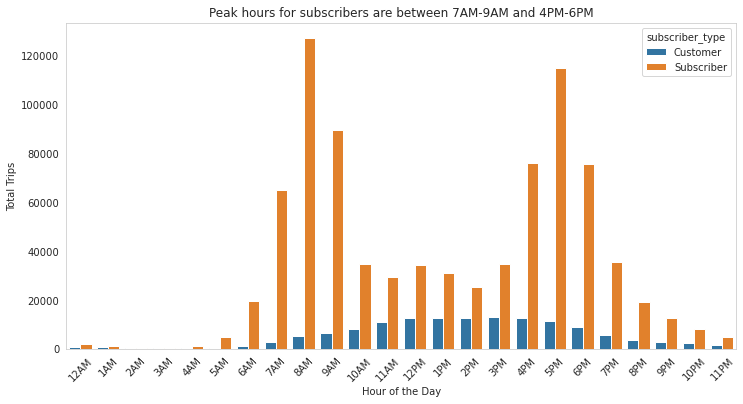

In [176]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (12,6))
count_shape = sns.barplot(x = melted_hours.hour, y= melted_hours.trip_count, hue = melted_hours.subscriber_type)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Total Trips')
plt.xlabel('Hour of the Day')
plt.title('Peak hours for subscribers are between 7AM-9AM and 4PM-6PM')

Most customers take trips during daylight hours between 11AM and 4PM. This is most likely because customers are taking trips for leisure, not during normal commuter times. Let's see if there is a specific time of the year where customers ride more often.

In [177]:
%%bigquery cust_trips_month
  SELECT  Count(*) AS Rides, EXTRACT(Month from Cast(start_date AS datetime)) AS Month
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    WHERE subscriber_type = "Customer"
    GROUP BY Month
    ORDER BY Month

Downloading: 100%|██████████| 12/12 [00:01<00:00, 11.56rows/s]


In [178]:
cust_trips_month

,Rides,Month
0,7713,1
1,7862,2
2,10158,3
3,9978,4
4,12741,5
5,12147,6
6,13152,7
7,15543,8
8,17310,9
9,14038,10


In [199]:
early_sum = cust_trips_month.Month.isin([5,6,7])
late_sum = cust_trips_month.Month.isin([8,9,10])
x = (sum(cust_trips_month.Rides[late_sum])/3) - (sum(cust_trips_month.Rides[early_sum])/3)
print("The difference in average rides between early summer months and later summer months is about",round(x,0), "rides")

The difference in average rides between early summer months and later summer months is about 2950.0 rides


Text(0.5, 1.0, 'Customers take trips most often between August and October')

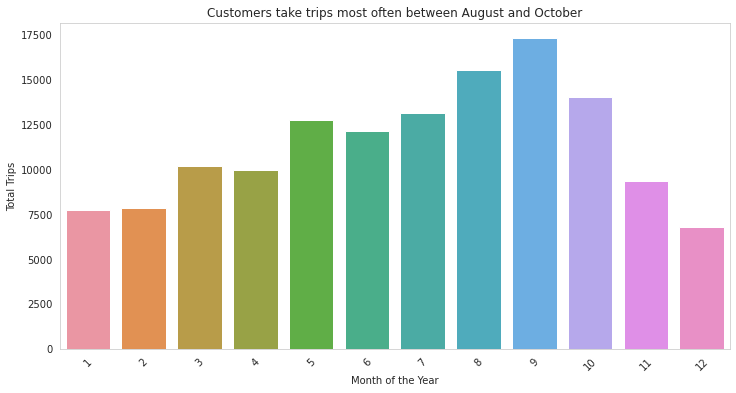

In [180]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (12,6))
count_shape = sns.barplot(x = cust_trips_month.Month, y= cust_trips_month.Rides)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Total Trips')
plt.xlabel('Month of the Year')
plt.title('Customers take trips most often between August and October')

Given this information about customers and remembering that the average duration of a customer trip is around an hour long, I'll propose a few customers-directed recommendations for promotions below and additional recommendations targeted at different potential or existing customers.

### Recommendations for promotions and offers based on findings

Below you can find a list of the promotions and offers I'm recommending after reviewing the bikeshare data
 * 15% off customer rides in early summer months from May to July (for subscriber type = customer)
 * 20% off subscriptions for customer subscriber types in August and September
 * 15% off Student discounts for subscriptions 
 * Create a rewards program for all customers and subscribers to get money off of their monthly subscription or money off a ride after reaching a certain number of points
 * Lyft ride rewards when users of Lyft (car) rides go on a certain amount of trips for $10 off a bike trip
 
 1. 15% off customer (non subscriber) rides in early summer months from May to July will increase customer-based ridership. The promotion is targeted at the earlier months of summer because although people are riding during warm summer months, ridership is on average 2,950 rides less per month in the early summer months of May through July than later months of August through October. <br>
 2. 20% off subscriptions for customers (non subscribers) in August and September will target non subscribing customers in the months when they are taking the most trips. The promotion will be at the beginning of the fall when school starts and people start taking less summer vacation. This will convince customer (non-subscribers) riders to buy a subscription for back to school / work time frame. <br>
 3. 15% off student discounts for subscriptions will give students in the San Francisco area discounted subscriptions with proof of student ID. This discount will target individuals with a small or nonexistent salary to hopefully gain commitment and ridership while making it cost-effective for the student to use the bikeshare to commute to and from classes. <br>
 4. A rewards program for riders based on number of bike trips and length of bike trips will make a more loyal customer base. Loyalty programs have been a proven method to increase or maintain a customer population because individuals naturally feel compelled to continue purchasing a product if there are rewards they are working towards. The rewards for this loyalty program would give subscribing customers a certain dollar-value off of their subscription after reaching a certain number of rides and would give non-subscribing customers a given dollar-value off individual ride passes. <br>
 5. A promotion to target people using Lyft car ride services will hopefully increase new customers using the bike service. By giving Lyft users a promotion for $10 off a bike ride, they may be compelled to try the bikeshare service. The more new users mean the more potential users to continue being customers of the bikeshare service.<br>
 
 With these five promotions, students, new customers, and current customers will all feel compelled to use Lyft bikeshare services. Targeting specific groups of people such as non-subscribers with these promotions will increase subscriptions and ridership.